In [1]:
# Tratamiento de datos
# ==============================================================================
import pandas as pd
import numpy as np

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

# Preprocesado y modelado
# ==============================================================================
from scipy.stats import pearsonr
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.anova import anova_lm
from scipy import stats

# Configuración matplotlib
# ==============================================================================
plt.rcParams['image.cmap'] = "bwr"
#plt.rcParams['figure.dpi'] = "100"
plt.rcParams['savefig.bbox'] = "tight"
style.use('ggplot') or plt.style.use('ggplot')

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

c:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
c:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,


## Leemos el dataset y valores perdidos "?"
### Elimino columnas Unnamed, numeros de serie, y los acidos que notienen valores 

In [2]:
na_values = ["Nan"]
#datos = pd.read_csv("X:/Documentos/Formacion/MBIG/ProjectoJamones/cerditos.csv", encoding = "utf-8", na_values= na_values)
datos = pd.read_csv("X:/Documentos/Formacion/MBIG/ProjectoJamones/Datos_NO_oleicos.csv", delimiter=',', encoding = "utf-8", na_values= na_values)
pd.options.display.max_columns = None
datos.head(10)
datos.drop(columns=['Anhada','NumeroSerieLc','AcidoOleico','AcidoPalmitico','AcidoEstearico','AcidoLinoleico','CodigoMatadero'
                    ,'Pesovientres','PesoCerdos','PesoNetoCanal'], axis=1, inplace=True)
datos

,TipoArticulo,Partida,Raza,Alimentacion,PesoVarios,Nacimiento,NroAnimales,PesoEntrada,TipoPesada,PesoSalida,DescripcionArticulo,FechaEntrada,FechaSalida
0,Paleta,2080.0,50% IBERICO,CEBO DE CAMPO,11789.048,05/09/2013,150,7.733333,Grupal,2.719,PALETA CEBO DE CAMPO IBÉRICA DESH.50% Raza Ib‚...,2014-09-22 00:00:00.000,2016-09-15 00:00:00.000
1,Jamón,8945.0,IBERICO,CEBO,0.000,NaN,412,6.755461,Grupal,3.850,JAMON IB. DE CEBO DESHUESADO,2016-07-01 00:00:00.000,2016-10-13 00:00:00.000
2,Paleta,2051.0,50% IBERICO,CEBO DE CAMPO,6939.748,15/04/2014,91,7.708791,Grupal,2.600,PALETA CEBO DE CAMPO IBÉRICA DESH.,2015-06-08 00:00:00.000,2017-07-20 00:00:00.000
3,Paleta,470.0,75% IBERICO,BELLOTA,11441.646,05/11/2014,140,8.775000,Grupal,2.412,PALETA DE BELLOTA IBÉRICA DESH.,2016-01-25 00:00:00.000,2018-02-01 00:00:00.000
4,Jamón,8945.0,IBERICO,CEBO,0.000,NaN,412,6.755461,Grupal,6.562,JAMON IBERICO CEBO (Ud..),2016-07-01 00:00:00.000,2016-11-18 00:00:00.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
114475,Jamón,44797.0,50% IBERICO,CEBO DE CAMPO,0.000,NaN,27,13.478868,Grupal,4.565,JAMàN DE CEBO DE CAMPO IBÉRICO DESH.,2017-09-26 00:00:00.000,2021-06-07 00:00:00.000
114476,Jamón,298.0,IBERICO,CEBO,8519.144,10/01/2012,145,11.700000,Grupal,NaN,JAMON IBERICO CEBO,2013-01-24 00:00:00.000,2015-06-01 00:00:00.000
114477,Paleta,594.0,75% IBERICO,BELLOTA,5726.504,01/11/2014,67,8.649254,Grupal,2.704,PALETA DE BELLOTA IBÉRICA DESH.,2016-01-28 00:00:00.000,2019-10-21 00:00:00.000
114478,Paleta,1080.0,IBERICO,CEBO,9131.150,24/03/2012,150,7.156667,Grupal,2.524,PALETA IB. BELLOTA DESH.,2013-04-16 00:00:00.000,2015-08-31 00:00:00.000


### Dimensiones de conjunto de Datos

In [3]:
print("Dimension dataset:", (datos.shape))
print()
datos.info()

Dimension dataset: (114480, 13)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114480 entries, 0 to 114479
Data columns (total 13 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   TipoArticulo         114480 non-null  object 
 1   Partida              114456 non-null  float64
 2   Raza                 113885 non-null  object 
 3   Alimentacion         114456 non-null  object 
 4   PesoVarios           114480 non-null  float64
 5   Nacimiento           89461 non-null   object 
 6   NroAnimales          114480 non-null  int64  
 7   PesoEntrada          114480 non-null  float64
 8   TipoPesada           114480 non-null  object 
 9   PesoSalida           108542 non-null  float64
 10  DescripcionArticulo  114474 non-null  object 
 11  FechaEntrada         114480 non-null  object 
 12  FechaSalida          114480 non-null  object 
dtypes: float64(4), int64(1), object(8)
memory usage: 11.4+ MB


### Reviso valores null


In [4]:
sns.set(rc ={"figure.figsize":(15,8)})

print(datos.isna().sum().sum())
print(datos.isnull().sum().sum())
print(datos.isna().sum())

31606
31606
TipoArticulo               0
Partida                   24
Raza                     595
Alimentacion              24
PesoVarios                 0
Nacimiento             25019
NroAnimales                0
PesoEntrada                0
TipoPesada                 0
PesoSalida              5938
DescripcionArticulo        6
FechaEntrada               0
FechaSalida                0
dtype: int64


<AxesSubplot:>

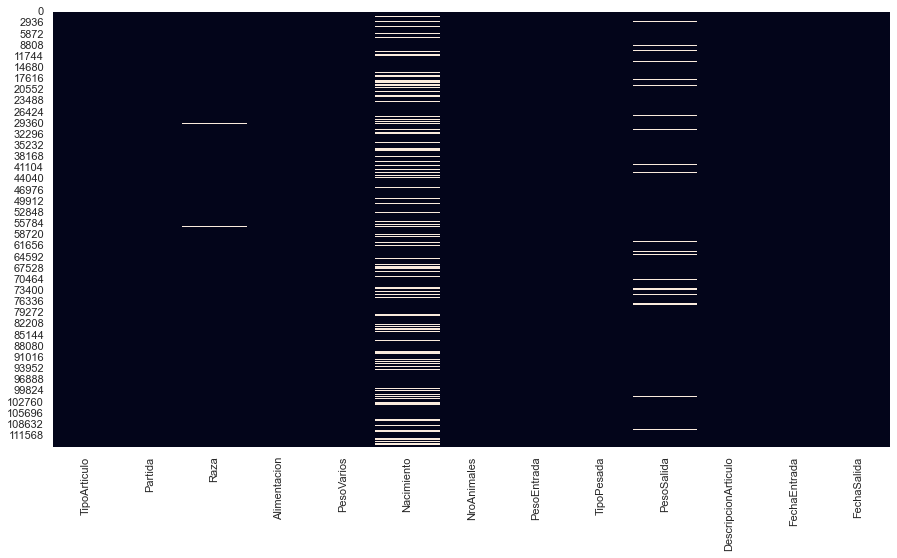

In [5]:
sns.heatmap(datos.isnull(),cbar=False)

# Elimino Fechas dobles y datos faltantes 


In [6]:
datos = datos.drop(datos[datos['Nacimiento'].str.len()>10].index)
datos = datos.drop(datos[datos['Nacimiento'].isna()].index)
datos = datos.drop(datos[datos['PesoSalida'].isna()].index)
datos = datos.drop(datos.index[[2211,1047,197,402,2217,2199,1368,646]])

In [7]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 85588 entries, 0 to 114479
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   TipoArticulo         85588 non-null  object 
 1   Partida              85588 non-null  float64
 2   Raza                 85588 non-null  object 
 3   Alimentacion         85588 non-null  object 
 4   PesoVarios           85588 non-null  float64
 5   Nacimiento           85588 non-null  object 
 6   NroAnimales          85588 non-null  int64  
 7   PesoEntrada          85588 non-null  float64
 8   TipoPesada           85588 non-null  object 
 9   PesoSalida           85588 non-null  float64
 10  DescripcionArticulo  85587 non-null  object 
 11  FechaEntrada         85588 non-null  object 
 12  FechaSalida          85588 non-null  object 
dtypes: float64(4), int64(1), object(8)
memory usage: 9.1+ MB


In [8]:
datos

,TipoArticulo,Partida,Raza,Alimentacion,PesoVarios,Nacimiento,NroAnimales,PesoEntrada,TipoPesada,PesoSalida,DescripcionArticulo,FechaEntrada,FechaSalida
0,Paleta,2080.0,50% IBERICO,CEBO DE CAMPO,11789.048,05/09/2013,150,7.733333,Grupal,2.719,PALETA CEBO DE CAMPO IBÉRICA DESH.50% Raza Ib‚...,2014-09-22 00:00:00.000,2016-09-15 00:00:00.000
2,Paleta,2051.0,50% IBERICO,CEBO DE CAMPO,6939.748,15/04/2014,91,7.708791,Grupal,2.600,PALETA CEBO DE CAMPO IBÉRICA DESH.,2015-06-08 00:00:00.000,2017-07-20 00:00:00.000
3,Paleta,470.0,75% IBERICO,BELLOTA,11441.646,05/11/2014,140,8.775000,Grupal,2.412,PALETA DE BELLOTA IBÉRICA DESH.,2016-01-25 00:00:00.000,2018-02-01 00:00:00.000
5,Paleta,1553.0,100% IBERICO,BELLOTA,3491.012,30/04/2015,43,8.170930,Grupal,4.880,PALETA NO APTA PARA EL CONSUMO HUMANO,2017-03-02 00:00:00.000,2019-06-10 00:00:00.000
6,Paleta,1553.0,100% IBERICO,BELLOTA,3491.012,30/04/2015,43,8.170930,Grupal,4.720,PALETA NO APTA PARA EL CONSUMO HUMANO,2017-03-02 00:00:00.000,2019-06-10 00:00:00.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
114472,Jamón,1415.0,100% IBERICO,BELLOTA,3704.874,22/04/2015,48,13.226804,Grupal,5.090,JAMON DE BELLOTA 100% IBÉRICO,2017-02-27 00:00:00.000,2021-06-30 00:00:00.000
114474,Paleta,796.0,100% IBERICO,BELLOTA,10360.206,05/08/2017,125,8.376000,Grupal,4.700,PALETA BELLOTA 100% IBÉRICA,2019-02-05 00:00:00.000,2022-02-14 00:00:00.000
114477,Paleta,594.0,75% IBERICO,BELLOTA,5726.504,01/11/2014,67,8.649254,Grupal,2.704,PALETA DE BELLOTA IBÉRICA DESH.,2016-01-28 00:00:00.000,2019-10-21 00:00:00.000
114478,Paleta,1080.0,IBERICO,CEBO,9131.150,24/03/2012,150,7.156667,Grupal,2.524,PALETA IB. BELLOTA DESH.,2013-04-16 00:00:00.000,2015-08-31 00:00:00.000


In [9]:
datos.shape

(85588, 13)

<AxesSubplot:>

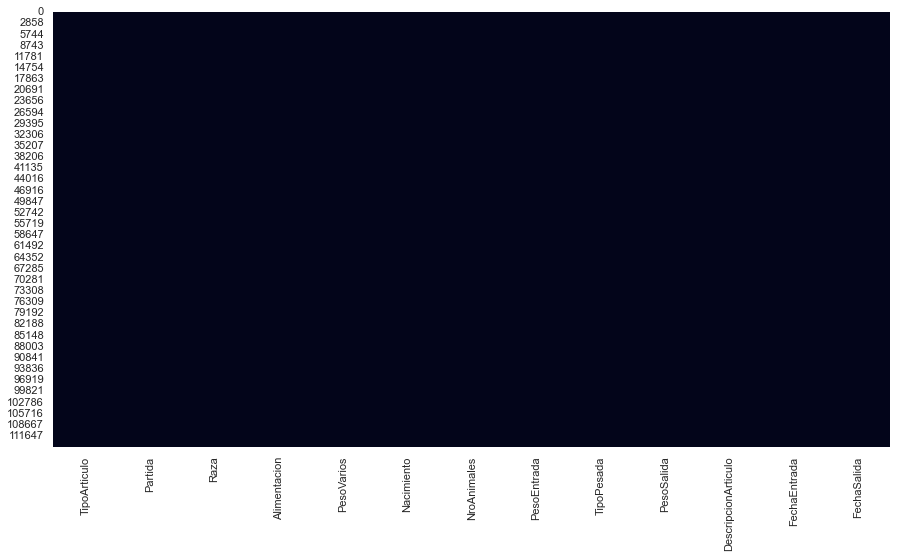

In [10]:
sns.heatmap(datos.isnull(),cbar=False)


### Reviso Duplicados

In [11]:
print(datos.duplicated().sum().sum())
dups = datos.duplicated()
# Miramos si hay duplicados
print('Algun duplicado? {}'.format(dups.any()))
print()
print('Registros duplicados: \n{}'.format(datos[dups]))
print()


42523
Algun duplicado? True

Registros duplicados: 
       TipoArticulo  Partida          Raza   Alimentacion  PesoVarios  \
29           Paleta   1254.0  100% IBERICO        BELLOTA    8385.062   
32           Paleta   1254.0  100% IBERICO        BELLOTA    8385.062   
58           Paleta    815.0  100% IBERICO        BELLOTA    6141.116   
63            Jamón   1996.0  100% IBERICO  CEBO DE CAMPO   10857.872   
66           Paleta   2021.0   50% IBERICO  CEBO DE CAMPO    7568.784   
...             ...      ...           ...            ...         ...   
114467        Jamón    446.0  100% IBERICO        BELLOTA    1401.640   
114471        Jamón   1415.0  100% IBERICO        BELLOTA    3704.874   
114472        Jamón   1415.0  100% IBERICO        BELLOTA    3704.874   
114478       Paleta   1080.0       IBERICO           CEBO    9131.150   
114479        Jamón  20163.0   50% IBERICO  CEBO DE CAMPO       0.000   

        Nacimiento  NroAnimales  PesoEntrada TipoPesada  PesoSalida  \


### Datos unicos por columna

In [12]:
counts = datos.nunique()
counts

TipoArticulo              2
Partida                 280
Raza                      4
Alimentacion              3
PesoVarios              289
Nacimiento              158
NroAnimales             104
PesoEntrada             617
TipoPesada                2
PesoSalida             2784
DescripcionArticulo     251
FechaEntrada            174
FechaSalida            1355
dtype: int64

### Corregimos Valores duplicados o iguales con distinto nombre

In [13]:
datos['Raza'] = datos['Raza'].replace(datos[datos['Raza'].str.len()>10].index)

datos['Raza'].replace(to_replace={'IBERICO': '50% IBERICO', 'IBERICO PURO': '100% IBERICO'}, inplace=True)
datos['Raza'].unique()

array(['50% IBERICO', '75% IBERICO', '100% IBERICO'], dtype=object)

In [14]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 85588 entries, 0 to 114479
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   TipoArticulo         85588 non-null  object 
 1   Partida              85588 non-null  float64
 2   Raza                 85588 non-null  object 
 3   Alimentacion         85588 non-null  object 
 4   PesoVarios           85588 non-null  float64
 5   Nacimiento           85588 non-null  object 
 6   NroAnimales          85588 non-null  int64  
 7   PesoEntrada          85588 non-null  float64
 8   TipoPesada           85588 non-null  object 
 9   PesoSalida           85588 non-null  float64
 10  DescripcionArticulo  85587 non-null  object 
 11  FechaEntrada         85588 non-null  object 
 12  FechaSalida          85588 non-null  object 
dtypes: float64(4), int64(1), object(8)
memory usage: 9.1+ MB


# Formatos de fechas y creamos el target1: tiempo de maduración

In [16]:
datos['FechaEntrada'] =  pd.to_datetime(datos['FechaEntrada'])
datos['FechaSalida'] =  pd.to_datetime(datos['FechaSalida'])
datos['Nacimiento'] =  pd.to_datetime(datos['Nacimiento'])

ParserError: String does not contain a date: -

### Añadimos variable Edad de sacrificio

In [ ]:
# PASO 5 CREAMOS COLUMNA EdadSacrificio CON FECHAS DE NACIMIENTO Y ENTRADA DE LA PIEZA

# EdadSacrificio EN DÍAS
datos['EdadSacrificio']= datos['FechaEntrada'] - datos['Nacimiento']
datos['EdadSacrificio']=datos['EdadSacrificio'].dt.days.astype(int)
datos['EdadSacrificio']



In [ ]:
# EdadSacrificioMESES EN MESES
datos["EdadSacrificio_MESES"]=round(((datos['FechaEntrada'] - datos['Nacimiento']).dt.days)/30.41).astype(int)
datos["EdadSacrificio_MESES"]

## Target1: T_Maduracion

In [17]:
from datetime import datetime as dt

datos["T_Maduracion"]= (datos['FechaSalida']-datos['FechaEntrada'])
datos["T_Maduracion"]= datos['T_Maduracion'].dt.days.astype(int)
datos["T_Maduracion"]



0          724
2          773
3          738
5          830
6          830
          ... 
114472    1584
114474    1105
114477    1362
114478     867
114479     521
Name: T_Maduracion, Length: 85588, dtype: int32

In [18]:
# TiempoMaduracionMESES EN MESES
datos["T_Maduracion_MESES"]=round(((datos['FechaSalida']-datos['FechaEntrada']).dt.days)/30.41).astype(int)
datos["T_Maduracion_MESES"]

0         24
2         25
3         24
5         27
6         27
          ..
114472    52
114474    36
114477    45
114478    29
114479    17
Name: T_Maduracion_MESES, Length: 85588, dtype: int32

In [19]:
datos.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 85588 entries, 0 to 114479
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   TipoArticulo         85588 non-null  object        
 1   Partida              85588 non-null  float64       
 2   Raza                 85588 non-null  object        
 3   Alimentacion         85588 non-null  object        
 4   PesoVarios           85588 non-null  float64       
 5   Nacimiento           85588 non-null  object        
 6   NroAnimales          85588 non-null  int64         
 7   PesoEntrada          85588 non-null  float64       
 8   TipoPesada           85588 non-null  object        
 9   PesoSalida           85588 non-null  float64       
 10  DescripcionArticulo  85587 non-null  object        
 11  FechaEntrada         85588 non-null  datetime64[ns]
 12  FechaSalida          85588 non-null  datetime64[ns]
 13  T_Maduracion         85588 non

In [ ]:
datos.describe()

### Primera tabla de correlaciones - para variables númericas

<AxesSubplot:>

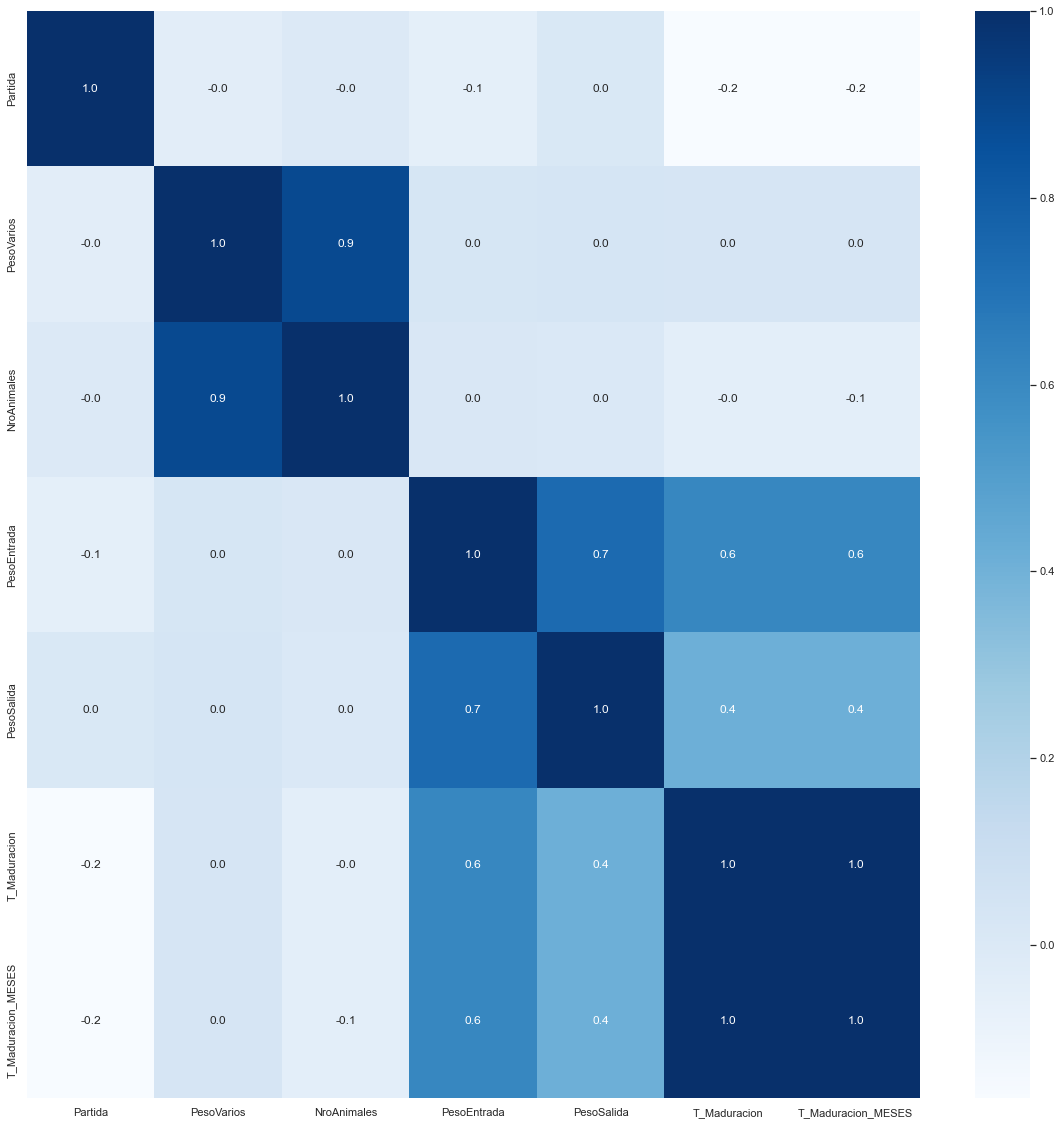

In [20]:
correlation_matrix = (datos).corr()
plt.figure(figsize=(20, 20))
sns.heatmap(correlation_matrix, cbar=True, fmt='.1f', annot=True, cmap='Blues')

### relac

### Detección de Outliers - por el momento lo dejamos aparcado

### ONE HOT ENCODER- codificación variables categóricas

In [21]:
# PASO 7 ONE_HOT_ENCODER A VARIABLES CON MENOS DE 10 CLASES

#VAMOS A HACER CREAR UN DATASET ONE_HOT_ENCODER APLICANDO EL ONE_HOT A TODAS LAS CATEGORÍAS QUE 
#TENGAN MENOS DE 11 CATEGORÍAS
datos_cod = datos.copy()


#Lista de número de categorías distintas del dataSet original
uvs = datos.nunique().tolist()

#Apuntaré en las siguientes dos listas los índices de las columnas de tengan menos y mas/igual de 11 categorías
ncol = []
ncolinv = []
#Con el bucle relleno ambas listas
c = 0
for i in uvs:
    if i<=10:
        ncol.append(c)
    else:
        ncolinv.append(c)
    c+=1

#DataSet con variables de menos de 11 categorías
datos_codA=datos_cod.iloc[:,ncol]

#DataSet con variables de mas de 10 categorías
datos_codB=datos_cod.iloc[:,ncolinv]
    
#Defino el ONE_HOT_ENCODER casero que hemos fabricado para no cargarnos el dataframe
def createDummies(df, var_name):
    dummy =pd.get_dummies(df[var_name])
    df=df.drop(var_name,axis=1)
    df=pd.concat([df,dummy],axis=1)
    return(df)
    
#Debido a que esta pensado para usarse con objects o strings hago la transformación pertinente
listcol = datos_codA.columns.tolist()
datos_codA = datos_codA.astype(str)

#Aplico el ONE_HOT_ENCODER casero al dataSet de menos de 11 categorías
datos_codA = createDummies(datos_codA, listcol)

#Concateno el dataSet que tiene variables con mas de 11 categorías
datos_OneH = pd.concat([datos_codA,datos_codB], axis = 1)
    

datos_OneH

,TipoArticulo_Jamón,TipoArticulo_Paleta,Raza_100% IBERICO,Raza_50% IBERICO,Raza_75% IBERICO,Alimentacion_BELLOTA,Alimentacion_CEBO,Alimentacion_CEBO DE CAMPO,TipoPesada_Grupal,TipoPesada_Individual,Partida,PesoVarios,Nacimiento,NroAnimales,PesoEntrada,PesoSalida,DescripcionArticulo,FechaEntrada,FechaSalida,T_Maduracion,T_Maduracion_MESES
0,0,1,0,1,0,0,0,1,1,0,2080.0,11789.048,05/09/2013,150,7.733333,2.719,PALETA CEBO DE CAMPO IBÉRICA DESH.50% Raza Ib‚...,2014-09-22,2016-09-15,724,24
2,0,1,0,1,0,0,0,1,1,0,2051.0,6939.748,15/04/2014,91,7.708791,2.600,PALETA CEBO DE CAMPO IBÉRICA DESH.,2015-06-08,2017-07-20,773,25
3,0,1,0,0,1,1,0,0,1,0,470.0,11441.646,05/11/2014,140,8.775000,2.412,PALETA DE BELLOTA IBÉRICA DESH.,2016-01-25,2018-02-01,738,24
5,0,1,1,0,0,1,0,0,1,0,1553.0,3491.012,30/04/2015,43,8.170930,4.880,PALETA NO APTA PARA EL CONSUMO HUMANO,2017-03-02,2019-06-10,830,27
6,0,1,1,0,0,1,0,0,1,0,1553.0,3491.012,30/04/2015,43,8.170930,4.720,PALETA NO APTA PARA EL CONSUMO HUMANO,2017-03-02,2019-06-10,830,27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114472,1,0,1,0,0,1,0,0,1,0,1415.0,3704.874,22/04/2015,48,13.226804,5.090,JAMON DE BELLOTA 100% IBÉRICO,2017-02-27,2021-06-30,1584,52
114474,0,1,1,0,0,1,0,0,1,0,796.0,10360.206,05/08/2017,125,8.376000,4.700,PALETA BELLOTA 100% IBÉRICA,2019-02-05,2022-02-14,1105,36
114477,0,1,0,0,1,1,0,0,1,0,594.0,5726.504,01/11/2014,67,8.649254,2.704,PALETA DE BELLOTA IBÉRICA DESH.,2016-01-28,2019-10-21,1362,45
114478,0,1,0,1,0,0,1,0,1,0,1080.0,9131.150,24/03/2012,150,7.156667,2.524,PALETA IB. BELLOTA DESH.,2013-04-16,2015-08-31,867,29


In [22]:
from sklearn.preprocessing import OrdinalEncoder

# PASO 9 CODIFICAMOS CON ORDINAL ENCODER
codificar = ["DescripcionArticulo"]
for columnas in codificar:
    oe = OrdinalEncoder()
    datos_OneH[columnas] = oe.fit_transform(datos_OneH[[columnas]])

In [23]:
datos_OneH

,TipoArticulo_Jamón,TipoArticulo_Paleta,Raza_100% IBERICO,Raza_50% IBERICO,Raza_75% IBERICO,Alimentacion_BELLOTA,Alimentacion_CEBO,Alimentacion_CEBO DE CAMPO,TipoPesada_Grupal,TipoPesada_Individual,Partida,PesoVarios,Nacimiento,NroAnimales,PesoEntrada,PesoSalida,DescripcionArticulo,FechaEntrada,FechaSalida,T_Maduracion,T_Maduracion_MESES
0,0,1,0,1,0,0,0,1,1,0,2080.0,11789.048,05/09/2013,150,7.733333,2.719,152.0,2014-09-22,2016-09-15,724,24
2,0,1,0,1,0,0,0,1,1,0,2051.0,6939.748,15/04/2014,91,7.708791,2.600,151.0,2015-06-08,2017-07-20,773,25
3,0,1,0,0,1,1,0,0,1,0,470.0,11441.646,05/11/2014,140,8.775000,2.412,122.0,2016-01-25,2018-02-01,738,24
5,0,1,1,0,0,1,0,0,1,0,1553.0,3491.012,30/04/2015,43,8.170930,4.880,250.0,2017-03-02,2019-06-10,830,27
6,0,1,1,0,0,1,0,0,1,0,1553.0,3491.012,30/04/2015,43,8.170930,4.720,250.0,2017-03-02,2019-06-10,830,27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114472,1,0,1,0,0,1,0,0,1,0,1415.0,3704.874,22/04/2015,48,13.226804,5.090,18.0,2017-02-27,2021-06-30,1584,52
114474,0,1,1,0,0,1,0,0,1,0,796.0,10360.206,05/08/2017,125,8.376000,4.700,132.0,2019-02-05,2022-02-14,1105,36
114477,0,1,0,0,1,1,0,0,1,0,594.0,5726.504,01/11/2014,67,8.649254,2.704,122.0,2016-01-28,2019-10-21,1362,45
114478,0,1,0,1,0,0,1,0,1,0,1080.0,9131.150,24/03/2012,150,7.156667,2.524,128.0,2013-04-16,2015-08-31,867,29


#### Estudio de Correlaciones

In [24]:
def tidy_corr_matrix(corr_mat):
    '''
    Función para convertir una matriz de correlación de pandas en formato tidy
    '''
    corr_mat = corr_mat.stack().reset_index()
    corr_mat.columns = ['variable_1','variable_2','r']
    corr_mat = corr_mat.loc[corr_mat['variable_1'] != corr_mat['variable_2'], :]
    corr_mat['abs_r'] = np.abs(corr_mat['r'])
    corr_mat = corr_mat.sort_values('abs_r', ascending=False)
    
    return(corr_mat)



corr_matrix = datos_OneH.select_dtypes(include=['float64', 'int']).corr(method='pearson')
tidy_corr_matrix(corr_matrix).head(20)

,variable_1,variable_2,r,abs_r
62,T_Maduracion_MESES,T_Maduracion,0.999685,0.999685
55,T_Maduracion,T_Maduracion_MESES,0.999685,0.999685
17,NroAnimales,PesoVarios,0.889303,0.889303
10,PesoVarios,NroAnimales,0.889303,0.889303
43,DescripcionArticulo,PesoEntrada,-0.737213,0.737213
29,PesoEntrada,DescripcionArticulo,-0.737213,0.737213
28,PesoEntrada,PesoSalida,0.736533,0.736533
35,PesoSalida,PesoEntrada,0.736533,0.736533
59,T_Maduracion_MESES,PesoEntrada,0.611911,0.611911
31,PesoEntrada,T_Maduracion_MESES,0.611911,0.611911


<AxesSubplot:>

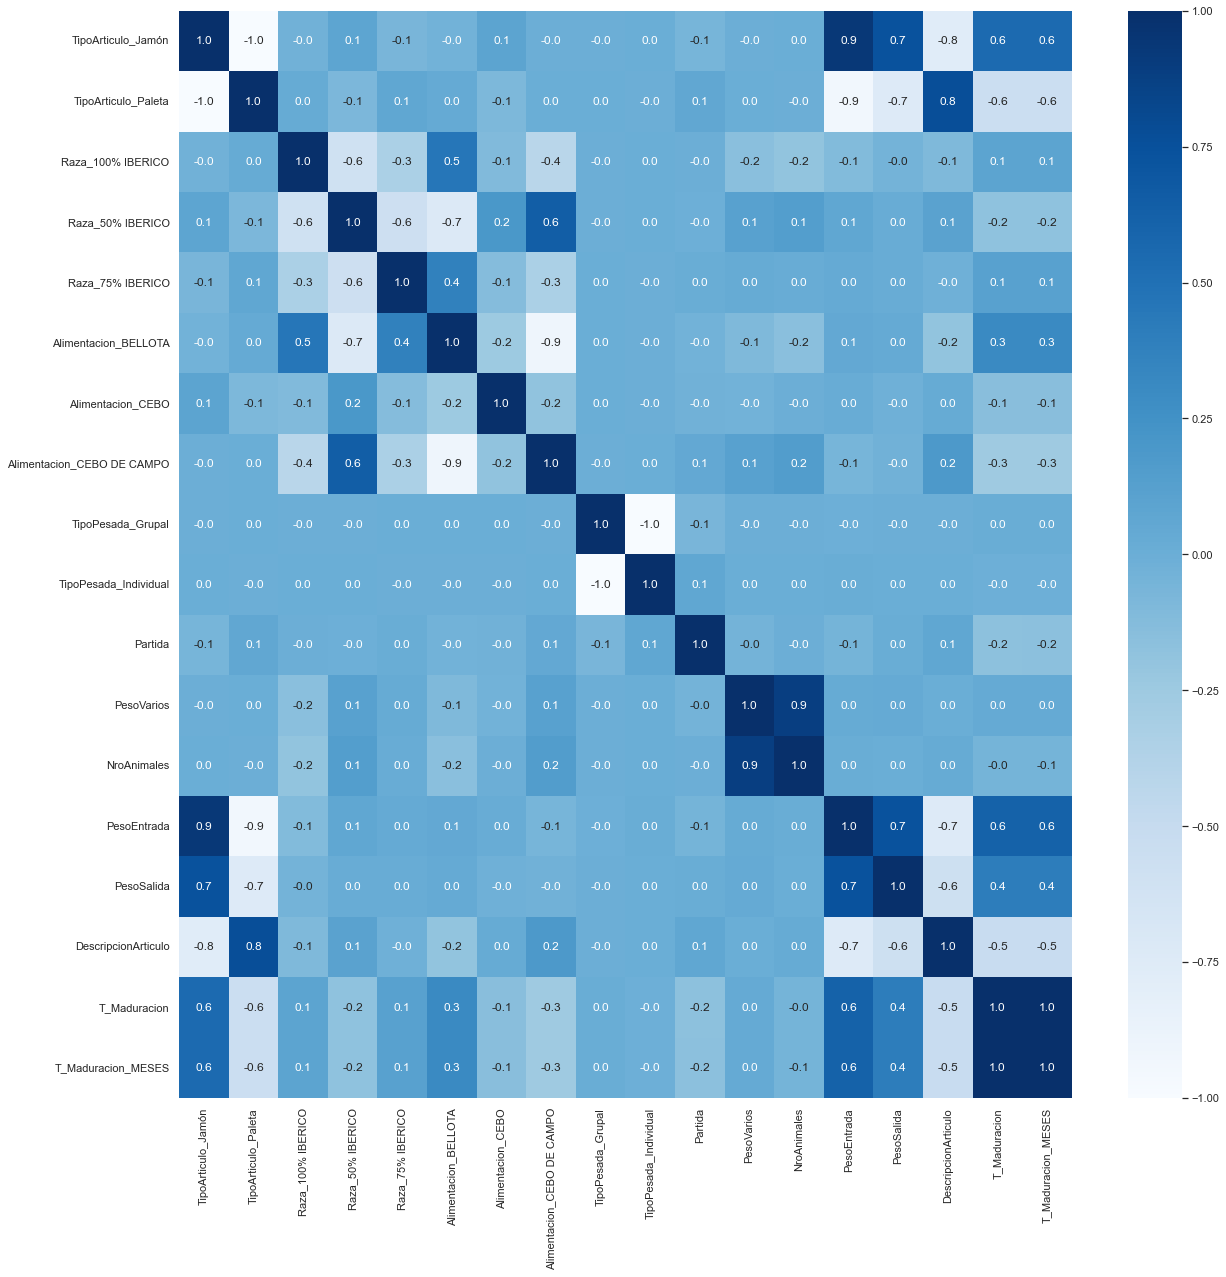

In [25]:
correlation_matrix = (datos_OneH).corr()
plt.figure(figsize=(20, 20))
sns.heatmap(correlation_matrix, cbar=True, fmt='.1f', annot=True, cmap='Blues')

In [ ]:
datos_OneH.info()

In [ ]:
# Gráfico de distribución para cada variable numérica
# ==============================================================================
# Ajustar número de subplots en función del número de columnas
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(20, 20))
axes = axes.flat
columnas_numeric = datos_OneH.select_dtypes(include=['float64','int64','int32']).columns

for i, colum in enumerate(columnas_numeric):
    sns.histplot(
        data    = datos_OneH,
        x       = colum,
        stat    = "count",
        kde     = True,
        color   = (list(plt.rcParams['axes.prop_cycle'])*2)[i]["color"],
        line_kws= {'linewidth': 2},
        alpha   = 0.3,
        ax      = axes[i]
    )
    axes[i].set_title(colum, fontsize = 10, fontweight = "bold")
    axes[i].tick_params(labelsize = 8)
    axes[i].set_xlabel("")


    
fig.tight_layout()
plt.subplots_adjust(top = 0.9)
fig.suptitle('Distribución variables numéricas', fontsize = 10, fontweight = "bold");

# Ajuste modelo

### División de datos en train y test

In [ ]:
x = datos_OneH[['PesoEntrada','PesoSalida','TipoArticulo_Jamón','Alimentacion_BELLOTA','TipoArticulo_Paleta']]
y = datos_OneH['T_Maduracion_MESES']

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8,random_state=1234,shuffle=True)

## Logistic Regresion

In [ ]:
# Entrenamos el modelo
modeloLR = LogisticRegression(max_iter=200)
modeloLR.fit(x_train,y_train)

#Predecimos sobre el dataset de test
y_pred = modeloLR.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
print('Precision: {:.3f}'.format(accuracy*100))

## Modelo regresión

In [ ]:
x_train = sm.add_constant(x_train, prepend=True)
modelo = sm.OLS(endog=y_train, exog=x_train,)
modelo = modelo.fit()
print(modelo.summary())


## Regresión Lineal metodo 1

In [ ]:
# División de los datos en train y test
# ==============================================================================
x2 = datos_OneH[['PesoEntrada']]
#x2_train=np.array(x2)
y2 = datos_OneH['T_Maduracion_MESES']

x2_train, x2_test, y2_train, y2_test = train_test_split(x2.values.reshape(-1,1),y2.values.reshape(-1,1),train_size = 0.8, random_state = 1234,shuffle = True)

# Creación del modelo
# ==============================================================================
modelo = LinearRegression()
modelo.fit(x2_train.reshape(-1,1), y2_train)

In [ ]:
# Información del modelo
# ==============================================================================
print("Intercept:", modelo.intercept_)
print("Coeficiente:", list(zip(x2.columns, modelo.coef_.flatten(), )))
print("Coeficiente de determinación R^2:", modelo.score(x2, y2))